# Ejercicio 2

**Nombre**: Juan Valdiviezo

## Ejercicio 2.2

Analice y ejecute el código a continuación

In [26]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
#Avoid warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [27]:
irisdata = pd.read_csv('iris.csv')

# se transforma el tipo de dato de la columna species para que sea categórico
irisdata["species"] = irisdata["species"].astype("category")

In [28]:
print(irisdata.head())
print(irisdata.info())
print(irisdata.describe())

In [29]:
irisdata['species'].value_counts()  # el problema tiene categorías con el mismo número de elementos

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

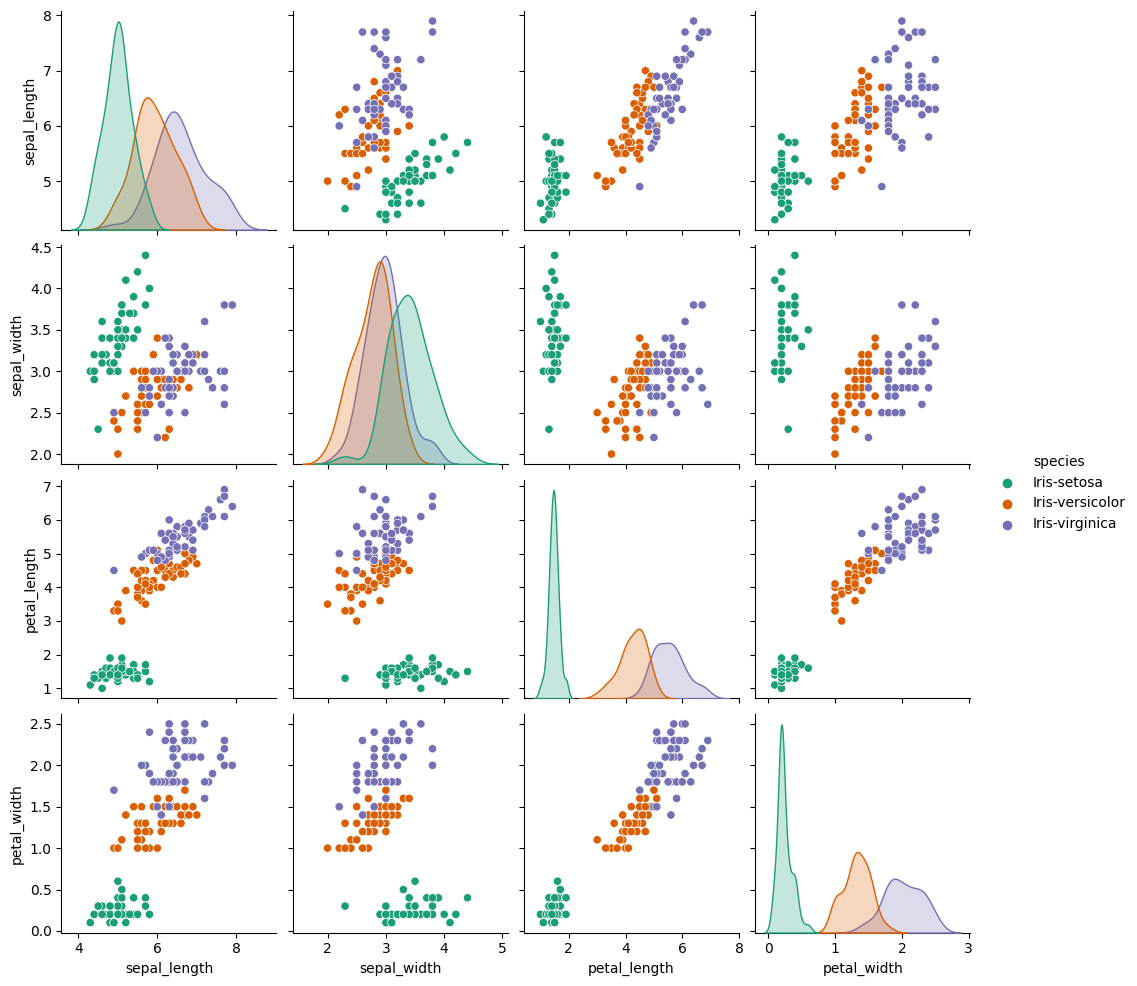

In [30]:
import seaborn as sns
sns.pairplot(irisdata,hue='species',palette='Dark2')

In [31]:
from sklearn.model_selection import train_test_split
X = irisdata.drop('species', axis=1)
y = irisdata['species']

# para mostrar superficies, se utilizan solo 2 columnas

X = irisdata[['sepal_length', 'sepal_width']].to_numpy()
y = irisdata["species"].cat.codes.to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [32]:
# kernels a ser probados
kernels = ['Polynomial', 'RBF', 'Sigmoid','Linear']

def getClassifier(ktype):
    """Función que retorna el modelo correspondiente de SVC y su denominación
    """
    if ktype == 0:
        # Polynomial kernal
        return SVC(kernel='poly', degree=8, gamma="auto"), "poly"
    elif ktype == 1:
        # Radial Basis Function kernal
        return SVC(kernel='rbf', gamma="auto"), "rbf"
    elif ktype == 2:
        # Sigmoid kernal
        return SVC(kernel='sigmoid', gamma="auto"), "sigmoid"
    elif ktype == 3:
        # Linear kernal
        return SVC(kernel='linear', gamma="auto"), "linear"

In [33]:
def mostrar_regiones(x, y, clf, title):
    """Muestra las regiones de decisión de un modelo SVC
    """

    # Plotting decision regions
    plot_decision_regions(x, y, clf=clf, legend=2)

    # muestra los support vectors
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
                linewidth=1, facecolors='none', edgecolors='k')

    # muestra las etiquetas en x y y
    plt.xlabel('sepal length [cm]')
    plt.ylabel('petal length [cm]')
    plt.title(title)
    plt.show()


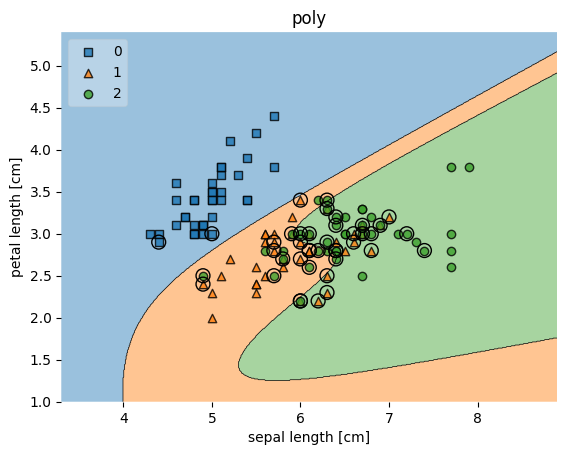

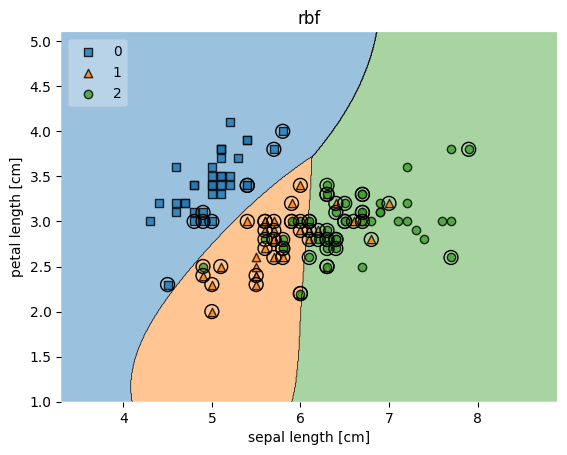

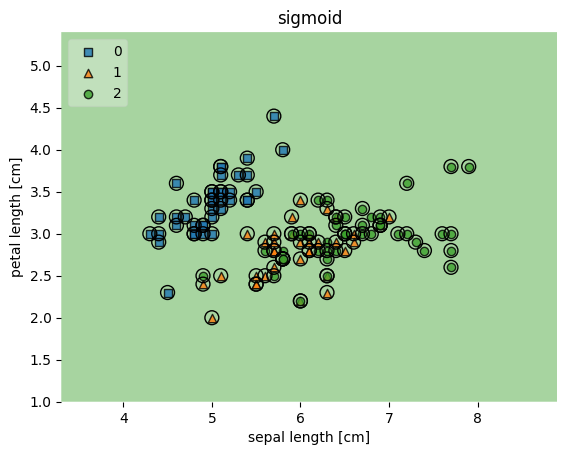

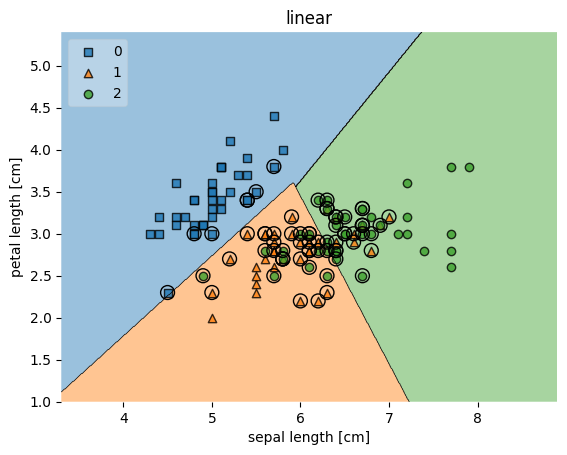

In [34]:
for i in range(len(kernels)):
    # Separate data into test and training sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

    # Train a SVC model using different kernel
    svclassifier, n_classifier = getClassifier(i)
    svclassifier.fit(X_train, y_train)

    # Make prediction
    y_pred = svclassifier.predict(X_test)

    # Evaluate our model
    print("Evaluation:", kernels[i], "kernel")
    print(classification_report(y_test,y_pred))

    mostrar_regiones(X_train, y_train, svclassifier, n_classifier)


## Ejercicio 2.2

Analice los resultados <br><br>
**¿Existe alguna combinación de hyper-parámetros que clasifique correctamente al problema?** <br>

En los gráficos anteriores podemos apreciar que uno de los kernels que mejores resultados presentó es el kernel 'rbf', debido a que visualmente se puede apreciar que la frontera de decisión es la que mejor separa los datos al no estar tan cerca de los puntos de entrenamiento y dejar un mejor margen de separación entre las clases. <br>


En caso de que se quiera ajustar los hyper-parámetros la combinación configuración manual que clasifica correctamente al problema es la siguiente:

- kernel = 'rbf'
- C = 10
- gamma = $ \frac{1}{n\_features * X.var()} $

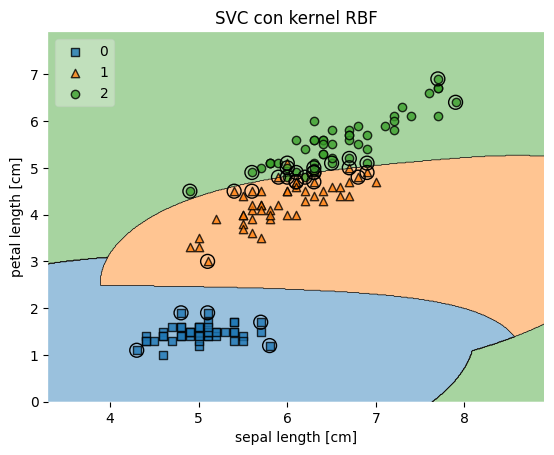

In [35]:
#Tomando a C = 10 y gamma como 1/2 * X_var()
gamma = 1/(2 * np.var(X_train))
print("Gamma:", gamma)
C = 10
#Tomamos petal length y sepal length
X = irisdata[['sepal_length', 'petal_length']].to_numpy()
target = irisdata["species"].cat.codes.to_numpy()

clf = SVC(kernel='rbf', C=C, gamma=gamma)
clf.fit(X, target)

mostrar_regiones(X, target, clf, "SVC con kernel RBF")

print(f"Reporte: {classification_report(target, clf.predict(X))}")


Al aplicar estos hyper-parámetros se obtiene un buen accuracy de 0.97 teniendo una frontea de decisión que separa correctamente los datos, dejando espacio entre los puntos de entrenamiento y la frontera de decisión.

**¿Alguna combinación produce visiblemente overfitting?**

Visualmente se puede concluir que el kernel que produce overfitting es el kernel 'poly' con un grado de 3. Esto es evidente en el área de color naranja ya que tiene muy cerca a la superficie de decisión, lo que indica que los datos de entrenamiento se ajustan muy bien a la superficie de decisión, pero no así los datos de prueba.

Esto también se refleja en el reporte de clasificación, donde se puede observar que el kernel 'poly' con un grado de 3 tiene un 100% de precisión en los datos de entrenamiento, pero solo un 50% de precisión en los datos de prueba.

En el reporte se aprecia que el modelo se memoriza completamente los datos de entrenamiento, pero no logrará generalizar bien con datos nuevos.

## Ejercicio 2.3

Determine los valores de hyper-parámetros: <br><br>
Seleccione manualmente (prueba/error) valores de hyper-parámetros que le proven resultados satisfactorios para este problema. Muestre la matriz de confusión de los resultados.

#### Probando con C = 100 y gamma como 500

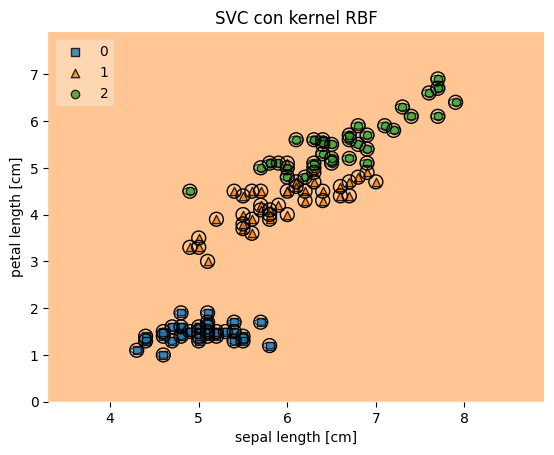

In [36]:
# Probando con C = 100 y gamma como 500
gamma = 500
C = 100
#Tomamos petal length y sepal length
X = irisdata[['sepal_length', 'petal_length']].to_numpy()
target = irisdata["species"].cat.codes.to_numpy()

#Usamos el 80% de los datos para entrenamiento y el 20% para test
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size = 0.20)

clf = SVC(kernel='rbf', C=C, gamma=gamma)
clf.fit(X_train, y_train)

mostrar_regiones(X_train, y_train, clf, "SVC con kernel RBF")

#Matriz de confusión
print("Matriz de confusión: ")
print(confusion_matrix(y_test, clf.predict(X_test)))



En este caso, al dar un valor muy elevado de gamma, el modelo se sobreajustó a los datos de entrenamiento y no logró generalizar bien con datos nuevos. Por lo tanto, se decidió disminuir el valor de gamma.

Para abordar este problema, se decidió disminuir el valor de gamma. Al hacerlo, se espera reducir la complejidad del modelo y, por lo tanto, su tendencia a sobreajustarse a los datos de entrenamiento. Esto debería mejorar la capacidad del modelo para generalizar a partir de los datos de entrenamiento y hacer predicciones más precisas en datos nuevos.

La matriz de confusión proporciona una visión clara de cómo el modelo está funcionando en las diferentes clases. En particular, se puede observar que el modelo tiene dificultades con la clase 1. A pesar de que el modelo es capaz de predecir correctamente todas las instancias de la clase 2, falla en casi todas las predicciones de la clase 1. Este desequilibrio en el rendimiento del modelo entre las clases subraya la necesidad de ajustar el parámetro gamma para mejorar la precisión general del modelo.

#### Probando con C = 5 y gamma como 0.05

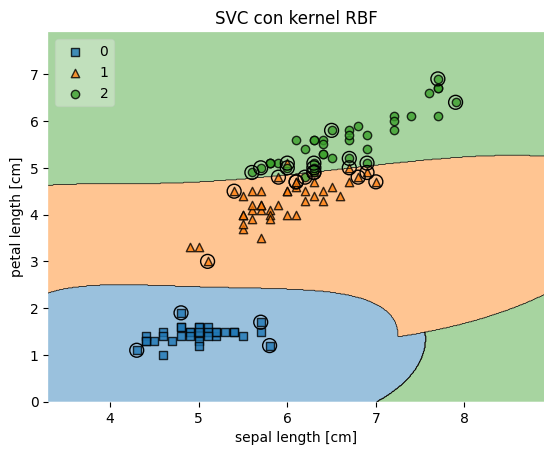

In [37]:
# Probando con C = 5 y gamma como 0.5
gamma = 0.5
C = 5
#Tomamos petal length y sepal length
X = irisdata[['sepal_length', 'petal_length']].to_numpy()
target = irisdata["species"].cat.codes.to_numpy()

#Usamos el 80% de los datos para entrenamiento y el 20% para test
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size = 0.20)

clf = SVC(kernel='rbf', C=C, gamma=gamma)
clf.fit(X_train, y_train)

mostrar_regiones(X_train, y_train, clf, "SVC con kernel RBF")

#Matriz de confusión
print("Matriz de confusión: ")
print(confusion_matrix(y_test, clf.predict(X_test)))


Al disminuir el valor de gamma a 0.5, el modelo logra generalizar mejor con datos nuevos y se puede apreciar en la matriz de confusión que acierta en todas las predicciones de la clase 0 y falla en dos predicciones de la clase 1.

## Ejercicio 2.4

Tuneando parámetros automáticamente: <br><br>

El código a continuación implementa un "grid-search" para determinar la combinación de hyper-parámetros más optima para el problema.

Ejecutar el código a continuación y compare los hyper-parámetros seleccionados en el ejercicio 2.3 y 2.4

### Tuneando parámetros

In [38]:
from sklearn.model_selection import GridSearchCV


In [39]:
param_grid = {
    'C': [0.01, 0.1,1, 10, 100],
    'gamma': [1,0.1,0.01,0.001, 0.0001],
    'kernel': ['rbf', 'poly', 'sigmoid']
}

In [40]:
grid = GridSearchCV(SVC(), param_grid,refit=True, verbose=2)  # verbose se usa solo para efectos de demostración
grid.fit(X_train, y_train)

#avoid printing the whole grid
print("Mejores parámetros: ", grid.best_params_)
print("Mejor estimador: ", grid.best_estimator_)

In [41]:
# el mejor modelo aprendido
print(grid.best_estimator_)


In [42]:
grid_predictions = grid.predict(X_test)
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))

#### **Comparación de los hyper-parámetros seleccionados en el ejercicio 2.3 y 2.4**

En el ejercicio 2.3 se seleccionó los hyper-parámetros C = 10 y gamma = 0.5, mientras que en el ejercicio 2.4 se seleccionó los hyper-parámetros mediante un grid-search, lo que permite optimizar los hyper-parámetros de manera automática. En la matriz de confusión se puede apreciar que el modelo seleccionado en el ejercicio 2.4 tiene un mejor desempeño que el modelo seleccionado en el ejercicio 2.3.

Esto es porque el grid-search permite probar todas las combinaciones de hyper-parámetros y seleccionar la combinación que mejor desempeño tenga.

## Ejercicio 2.5

La normalización de datos en Machine Learning es un proceso típicamente utilizado para que variables de gran magnitud no dominen los cálculos del modelo. Para ello, implemente un grid-search para el problema; pero antes, transforme el vector de características para que cada variable tenga un rango entre 0 y 1.

Para ello, averigue el uso de la función `MinMaxScaler` del paquete `sklearn.preprocessing`

¿Los resultados varían?

#### **Uso de la función MinMaxScaler**

Se trata de una técnica de preprocesamiento que se utiliza para transformar los datos en un rango específico. En el caso de MinMaxScaler, el rango es de 0 a 1. Esto significa que el valor más pequeño de la característica se convierte en 0 y el valor más grande se convierte en 1. Los valores intermedios se escalan entre 0 y 1 de acuerdo con su posición relativa.


In [43]:
from sklearn.preprocessing import MinMaxScaler
#Normalizando los datos
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Encotnrando los mejores parámetros mediante GridSearchCV
param_grid = {
    'C': [0.01, 0.1,1, 10, 100],
    'gamma': [1,0.1,0.01,0.001, 0.0001],
    'kernel': ['rbf', 'poly', 'sigmoid']
}

grid = GridSearchCV(SVC(), param_grid,refit=True, verbose=2)  # verbose se usa solo para efectos de demostración
grid.fit(X_train, y_train)

# el mejor modelo aprendido
print(grid.best_estimator_)
grid_predictions = grid.predict(X_test)

In [44]:
#Mejor C y gamma
print("Mejor C y gamma: ")
print(grid.best_params_)

En este apartado, el grid search se realiza con los datos normalizados. Nos ha retornado un valor de C = 100 y gamma = 1.0. En la matriz de confusión se puede apreciar que el modelo normalizado tiene un mejor desempeño que el modelo sin normalizar.

In [45]:
print(classification_report(y_test,grid_predictions))

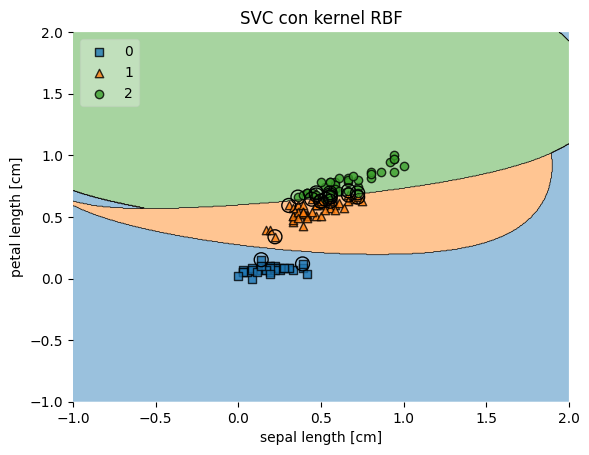

In [46]:
#Tomando los mejores parámetros
gamma = grid.best_params_['gamma']
C = grid.best_params_['C']

clf = SVC(kernel='rbf', C=C, gamma=gamma)
clf.fit(X_train, y_train)

mostrar_regiones(X_train, y_train, clf, "SVC con kernel RBF")




In [47]:
#Matriz de confusión
print("Matriz de confusión: ")
print(confusion_matrix(y_test, clf.predict(X_test)))


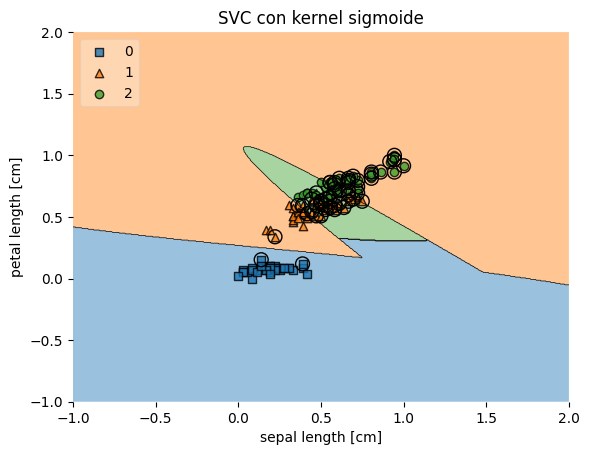

In [48]:
#Sigmoide
clf = SVC(kernel='sigmoid', C=C, gamma=gamma)
clf.fit(X_train, y_train)

mostrar_regiones(X_train, y_train, clf, "SVC con kernel sigmoide")


In [49]:
#Matriz de confusión
print("Matriz de confusión: ")
print(confusion_matrix(y_test, clf.predict(X_test)))

In [50]:
#reporte de clasificación
print(classification_report(y_test, clf.predict(X_test)))

#### **Análisis de los resultados:**

Se puede apreciar que a comparación de los puntos anteriores el modelo seleccionado en el ejercicio 2.5 tiene un mejor desempeño ligeramente que los modelos seleccionados en los ejercicios 2.3 y 2.4. Esto se debe a que la normalización de datos permite que las variables de gran magnitud no dominen los cálculos del modelo. Incluso después de normalizar los datos, el kernel 'rbf' sigue siendo el que mejor desempeño tiene y por lo menos se mejoró el desempeño del kernal 'sigmoid' que en los puntos anteriores tenía un desempeño muy bajo y se encontraba muy poco ajustado a los datos.
